In [26]:
import pandas as pd
data = pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True) 
# parse_dates=True 这个很重要，将date转换称标准格式，下面的以周为单位计算等才能用
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 01:00:00,4,6
2012-10-03 02:00:00,4,1
2012-10-03 03:00:00,1,1
2012-10-03 04:00:00,2,3
2012-10-03 05:00:00,6,5


## Visualizing the Dataset  肉眼观察数据

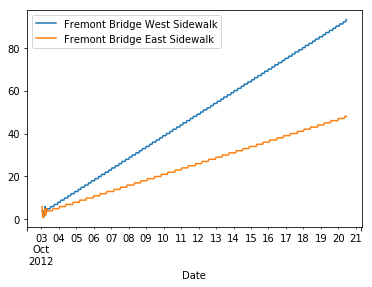

In [27]:
%matplotlib inline
data.plot()

### 数据重采样，按周计算

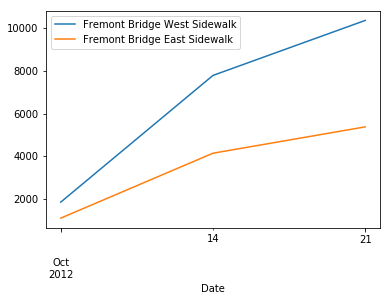

In [28]:
%matplotlib inline
data.resample('w').sum().plot() 

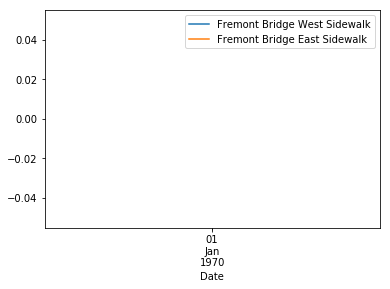

In [30]:
%matplotlib inline
data.resample('D').sum().rolling(365).sum().plot()  #rolling滑动窗口，每个点对应的横坐标都是之前365天数据的总和
#数据太少了，看不出来效果

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text xticklabel objects>)

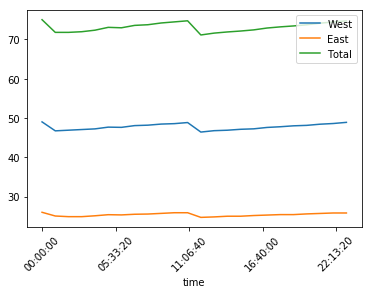

In [35]:
import matplotlib.pyplot as plt
data.groupby(data.index.time).mean().plot()  #求时间点的平均值
plt.xticks(rotation=45)

In [ ]:
data.columns = ['West','East']

In [37]:
#pivot table    pivot:枢轴; 中心点，中枢
data['Total'] = data['West'] + data['East']
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,NaN,13.0,21.0,29.0,36.0
01:00:00,10.0,14.0,21.0,29.0,37.0
02:00:00,5.0,14.0,21.0,30.0,37.0
03:00:00,2.0,15.0,22.0,30.0,37.0
04:00:00,5.0,15.0,22.0,30.0,38.0


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text xticklabel objects>)

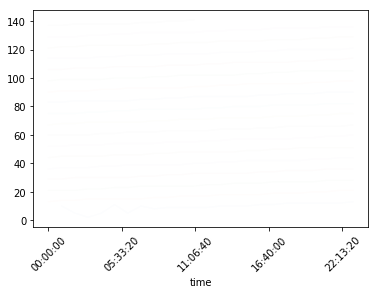

In [38]:
pivoted.plot(legend=False, alpha=0.01)
plt.xticks(rotation=45)

In [39]:
pivoted.shape

(24, 18)

In [41]:
X = pivoted.fillna(0)

In [42]:
#聚类，看看数据是在东边还是西边的
from sklearn.decomposition import PCA  #decomposition 分解; 腐烂
X2 = PCA(2).fit_transform(X)  #transform 变换;
X2.shape  

array([[ 69.20502032,   9.55978611],
       [ 68.70687482,   4.1379455 ],
       [ 69.74151496,   5.01872805],
       [ 69.66627246,   4.7764176 ],
       [ 69.46379067,   2.731904  ],
       [ 69.086911  ,  -1.13488219],
       [ 69.15859279,   0.22242938],
       [ 69.86055409,  -2.91964074],
       [ 69.78530706,  -3.35520988],
       [ 70.58342457,  -5.20237808],
       [ 70.4472523 ,  -6.39390836],
       [ 71.32838456,  -7.421023  ],
       [-68.88016979,   7.51691675],
       [-69.10415181,   5.52766931],
       [-69.24450895,   4.41960187],
       [-69.35560279,   3.478262  ],
       [-69.49472449,   2.17740552],
       [-69.71510165,   0.31031805],
       [-69.85422335,  -0.99053842],
       [-69.96412241,  -1.91388397],
       [-70.1038949 ,  -3.06508354],
       [-70.29916423,  -4.63595958],
       [-70.43893672,  -5.78715914],
       [-70.5792985 ,  -7.05771727]])

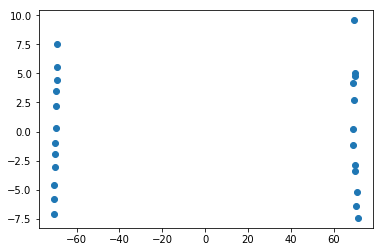

In [43]:
plt.scatter(X2[:,0],X2[:,1])

In [48]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)  #类似于kmeans，需要指定堆的个数，这里是隐藏了两种高斯分布
gmm.fit(X)
labels = gmm.predict_proba(X)
labels #左右两边数字表示这个样本属于左边的概率和属于右边的概率

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [49]:
labels = gmm.predict(X)
labels #不想得到概率值，就想得到它属于某个类别

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

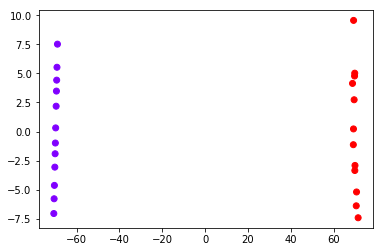

In [50]:
plt.scatter(X2[:,0],X2[:,1],c=labels,cmap='rainbow')

Text(0.5,1,'Red Cluster')

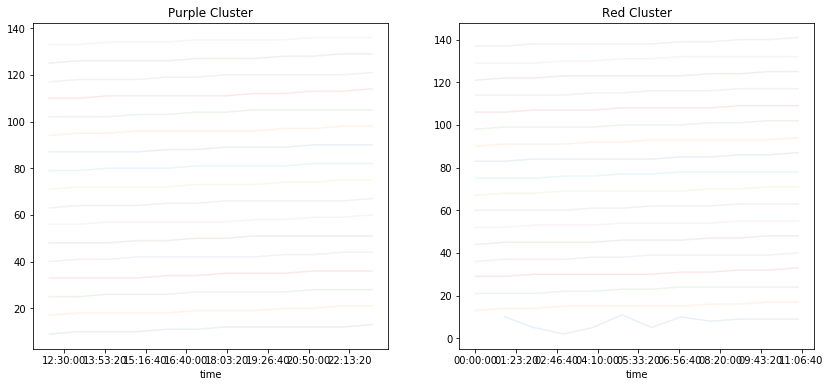

In [58]:
#GMM降维之前数据的分布
fig, ax = plt.subplots(1,2,figsize=(14,6))

pivoted[labels==0].plot(legend=False,alpha=0.1,ax=ax[0])
pivoted[labels==1].plot(legend=False,alpha=0.1,ax=ax[1])

ax[0].set_title("Purple Cluster")
ax[1].set_title('Red Cluster')

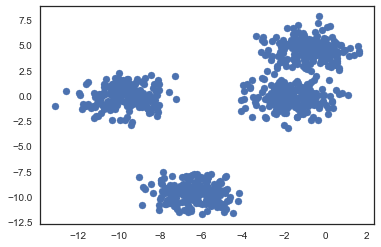

In [67]:
from sklearn.datasets.samples_generator import make_blobs
import seaborn as sns

sns.set_style("white") 
X,y_true = make_blobs(n_samples=800, centers=4, random_state=11)
plt.scatter(X[:,0],X[:,1])

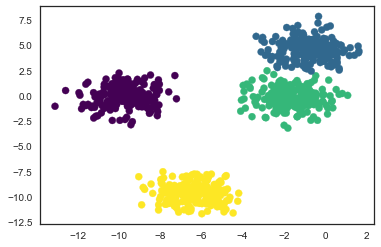

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_means = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_means,s=50,cmap='viridis')
centers = kmeans.cluster_centers_

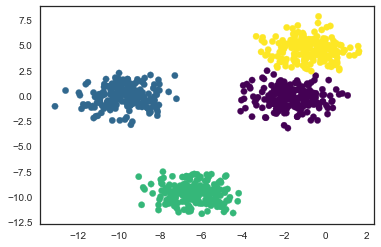

In [70]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(4)  
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

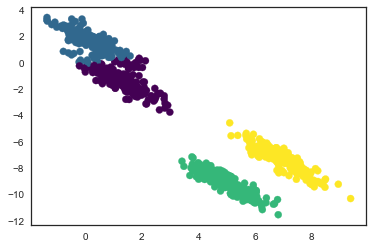

In [73]:
#上面看到结果GMM和KMEANS算出来的结果一样，现在对数据进行变换，其中两堆有重合了
import numpy as np
rng = np.random.RandomState(13)
X_stretched = np.dot(X,rng.randn(2,2))

kmeans = KMeans(n_clusters = 4,random_state=1) #random_state让每次出现的随机点都是一致的
kmeans.fit(X_stretched)
y_means = kmeans.predict(X_stretched)

plt.scatter(X_stretched[:,0],X_stretched[:,1],c=y_means,s=50,cmap='viridis')
centers = kmeans.cluster_centers_

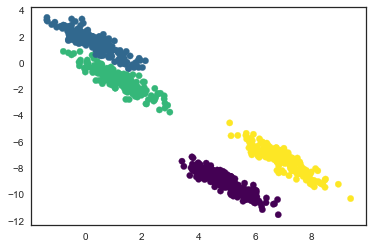

In [74]:
gmm = GaussianMixture(4)  
gmm.fit(X_stretched)
labels = gmm.predict(X_stretched)
plt.scatter(X_stretched[:,0],X_stretched[:,1],c=labels,s=40,cmap='viridis')
#可以看到GMM分开了。 如果数据内部有不同的分布，但是数据又没有分开，那么就可以用GMM